<a href="https://colab.research.google.com/github/therealfortune/tensorflow-fortune/blob/master/subword_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf 
print(tf.__version__)

2.7.0


In [16]:
import tensorflow_datasets as tfds 
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info =True, as_supervised = True)

In [5]:
train_data, test_data = imdb['train'], imdb['test']

In [6]:
tokenizer = info.features['text'].encoder

In [7]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [10]:
example = "Tensorflow, from basics to mastery"
tokenized_string = tokenizer.encode(example)
print('The tokenized string is {}'.format(tokenized_string))

string = tokenizer.decode(tokenized_string)
print('The original string is {}'.format(string))

The tokenized string is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string is Tensorflow, from basics to mastery


In [13]:
for ts in tokenized_string:
  print('{} ---> {}'.format(ts, tokenizer.decode([ts])))

6307 ---> Ten
2327 ---> sor
2934 ---> flow
2 ---> , 
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y


In [15]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [17]:
embedding_dim = 64
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 18s 42ms/step - loss: 0.6665 - accuracy: 0.6342 - val_loss: 0.5990 - val_accuracy: 0.7754
Epoch 2/10
391/391 [==============================] - 16s 40ms/step - loss: 0.4844 - accuracy: 0.8195 - val_loss: 0.4208 - val_accuracy: 0.8442
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 0.3481 - accuracy: 0.8757 - val_loss: 0.3508 - val_accuracy: 0.8619
Epoch 4/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2832 - accuracy: 0.9025 - val_loss: 0.3193 - val_accuracy: 0.8776
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2477 - accuracy: 0.9118 - val_loss: 0.3105 - val_accuracy: 0.8800
Epoch 6/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2221 - accuracy: 0.9206 - val_loss: 0.3070 - val_accuracy: 0.8828
Epoch 7/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2026 - accuracy: 0.9277 - val_loss: 0.3059 - val_accuracy:

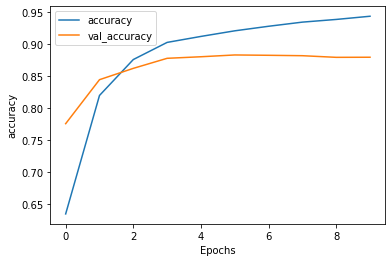

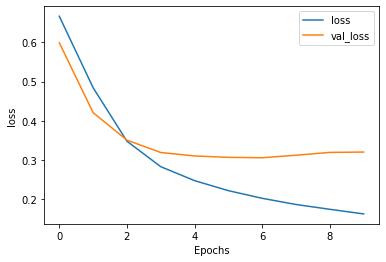

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')